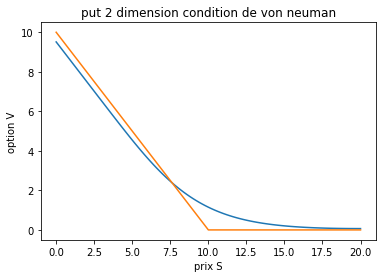

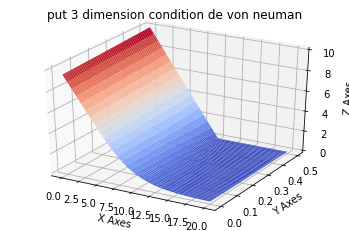

In [16]:
# put europeen
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

""" condition neuman"""
L=20
K=10
T=0.5
r=0.1
r=0.1
sigma=0.5
N=99
M=4999
S=np.linspace(0,L,N+2)
t=np.linspace(0,T,M+2)
dt=T/(M+2)
ds=L/(N+2)
V=[0]*(M+2)

for i in range(M+2):
    V[i]=[0]*(N+2)

def conditionfinale(S):
    K=10
    return max(K-S,0)

 
for i in range(N+2):
    V[M+1][i]=max(K-S[i],0)
    

for n in range(M+1,0,-1):
    for i in range(0,N+1):
        V[n-1][i]=V[n][i]+dt*(r*S[i]*(V[n][i+1]-V[n][i-1])/(2*ds)+1/2*sigma**2*S[i]**2*(V[n][i+1]+V[n][i-1]-2*V[n][i])/(ds*ds)-r*V[n][i])

    V[n-1][N+1]=V[n-1][N]
    V[n-1][0]=V[n-1][1]+ds
    
plt.plot(S,V[0], label='à t=0 ')
plt.xlabel("prix S")
plt.ylabel("option V")
plt.plot(S,V[M+1], label='à t=T ')
plt.xlabel("prix S")
plt.title("put 2 dimension condition de von neuman")
plt.show()

fig = plt.figure()
ax = plt.axes(projection="3d")
 
#Labeling
ax.set_xlabel('X Axes')
ax.set_ylabel('Y Axes')
ax.set_zlabel('Z Axes')

S,t=np.meshgrid(S,t)


V=np.array(V)

#ax.plot_surface(S,t,V,cmap=gradient(V))

ax.plot_surface(S,t,V,cmap=cm.coolwarm)
ax.set_title( "put 3 dimension condition de von neuman")

plt.show()